### Аналитическое решение через numpy

In [68]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
%matplotlib inline


In [69]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [70]:
plt.style.use('seaborn-v0_8')

In [71]:
column_names = ['CRIM', 'ZM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [72]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZM       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Пропуски необходимо заполнить. Категориальные признакие необходимо закодировать.

In [73]:
boston_data.describe()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Визуализация матрицы корреляции<br>
Анализируем связь факторов с целевым признаком 'MEDV'

Text(0, 0.5, 'Corr coeff')

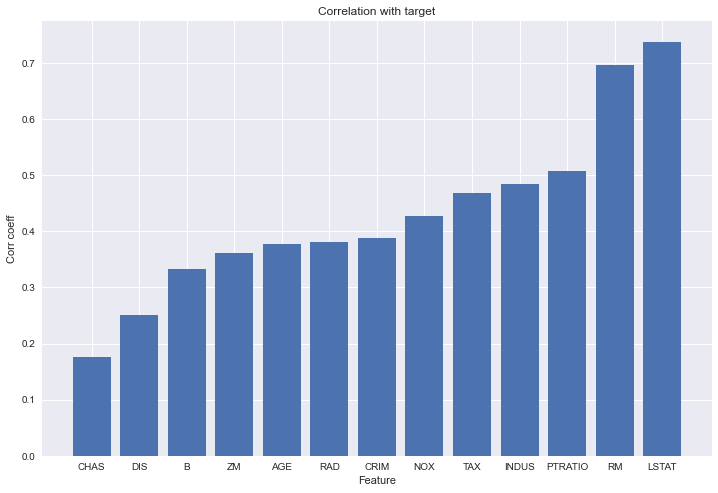

In [74]:
# Вычисляем модуль корреляции с целевой переменной
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
# Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')

# Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(12, 8)) # строим фигуру и координтаную плоскость
ax.bar(corr_with_target.index, corr_with_target.values) # строим столбчатую диаграмму и определяем источник данных
ax.set_title('Correlation with target') # титл - название графика
ax.set_xlabel('Feature') # ось х "свойства", признаки
ax.set_ylabel('Corr coeff') # ось y "коэффициаент корреляции"

Самый скоррелированный с ['MEDV'] является признак ['LSTAT'] - процент насления с низким статусом.
<br>Построим линейную регрессию, используя этот признак
<br>Строим линейную регрессию = обучаем линейную регрессию = находим её параметры

In [75]:
X = boston_data[['LSTAT']] # матрица наблюдений, двойнфе скобки говорят, что это уже матрица, а не просто вектор как в след строке
y = boston_data['MEDV'] # вектор правильных ответов
#X.head()
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [76]:
# Функция линейной регрессии
def linear_regression (X, y):
    
    # создаём единичный вектор
    ones = np.ones(X.shape[0])
    
    # добавляем вектор к таблице первым столбом
    X = np.column_stack([ones, X])
    
    # вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    
    # вычисляем вектор коеффициентов
    w = Q @ X.T @ y
    
    return w

In [77]:
# Вычисляем параметры линейной регрессии
w = linear_regression(X, y)

# Выводим вычислинные значения парамтров в виде вектора
print(f'Vector w: {w}')

# Выводим вычисленные параметры с округлением до двух знаков после запятой
print(f'w0: {w[0]:.2f}')
print(f'w1: {w[1]:.2f}')
print('Модель будет иметь вид Y = 34.55 - 0.95*X1')

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95
Модель будет иметь вид Y = 34.55 - 0.95*X1


In [78]:
# предсказание значение медианной стоимости подстановкой значения в модель
# задаем процент низкостатусного населения
x_example = 5.18

# делаем предсказание
y_predict = w[0] + w[1] * x_example
print(f'Predicted value: {float(y_predict):.2f}')

Predicted value: 29.63


In [79]:
# работаем с одним признаком, можем визуализировать в 2_d
# X - матрица наблюдений
# y_true - столбец с правильными ответами-значениями
# y_predict - столбец с предсказанием модели
# xlabel, ylabel - наименование осей по умолчанию

def plot_regression_2d (X, y_true, y_predict, xlabel = 'LSTAT', ylabel = 'MEDV'):
    fig, ax = plt.subplots(figsize=(10, 5)) # создаем координатную плоскость и задаем её размер
    ax.scatter(X, y_true, alpha=0.7, label='Simple Data') # рисуем диаграмму рассеяния, отображаем все точки на плоскости
    ax.plot(X, y_predict, color='black', label='Regression model') # рисуем линейный график с предсказательной прямой
    ax.set_xlabel(xlabel) # наименование оси абсцисс
    ax.set_ylabel(ylabel) # наименование оси ординат
    ax.legend(facecolor='white', fontsize=11) # легенда

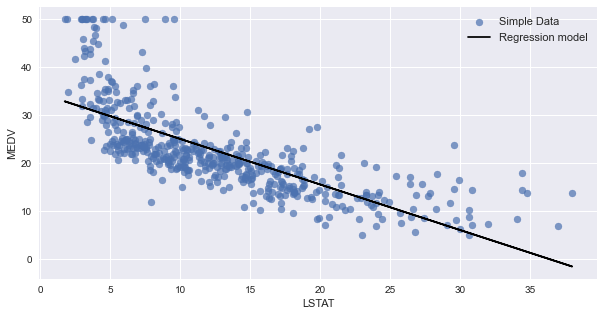

In [80]:
# визуализируем предсказания для всех объектов их матрицы "Х"
y_predict = w[0] + w[1] * X

# направляем предсказания в функцию визуализацию
plot_regression_2d(X, y, y_predict)

### Аналитическое решение через sklearn

In [81]:
from sklearn import linear_model #линейные модели

In [82]:
# реализцем через класс LinearRegression и метод fit()
# W0 вычисляем через атрибут interceptor_
# вектор W1, W2, ..., Wm вычисляем через атрибут coef_
# данный способ реализуется, когда с матрице Х один фактор

# Создаем объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()

# обучаем модель - ищем параметры по МНК
lr_lstat.fit(X, y)

print(f'w0: {lr_lstat.intercept_}') # вычилсяем свободный член w0
print(f'w1: {lr_lstat.coef_}') # вычилсяем паарметры модели W1, W2, ..., Wm


w0: 34.5538408793831
w1: [-0.95004935]


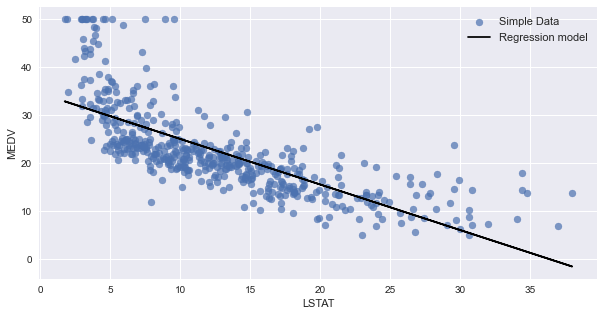

In [83]:
# визуализируем предсказания для всех наблюдений из матрицы "Х", не прописывая формулу модели с коэффициентами
# обучим модель с помощью метода predict()

# предсказываем медианную цену для всех участков из набора по одному признаку
y_predict = lr_lstat.predict(X) # метод можно использовать для всех признаков, нужно подать матрицу из всех признаков

# визуализируем через функцию
plot_regression_2d(X, y, y_predict)

Ранее линейную регрессию мы применяли к матрице с одним признаком.
<br>Линейную регрессию можно применить и ко всем признакам дата-сета <b>boston</b>

1. Выберем из таблицы <i><b>'boston'</b></i> все признаки
2. Удалим столбец с целевым признаком <i><b>'MEDV'</b></i>
3. Полученную матрицу <i><b>'Х'</b></i> и вектор правильных ответов <i><b>'y'</b></i> направим в функцию <i><b>fit()</b></i> и вычислим паарметры модели.

In [84]:
# составляем список наименование факторов (признаков) и исключаем целевой столбец MEDV
features = boston_data.drop('MEDV', axis=1).columns

# составляем матрицу наблюдений 'X' и вектор ответов 'y'
X = boston_data[features] # с помощью списка колонок определяем какие включим в матрицу
y = boston_data['MEDV']

# Создаем объект (модель) класса LinearRegresion
lr_full = linear_model.LinearRegression()

# обучаем модель - ищем параметры по МНК
lr_full.fit(X, y)

LinearRegression()

In [85]:
# сфоримруем таблицу из признаков и коэфф по каждому признаку
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full.coef_})#df через словарь: 1 столб наименования, 2 столб коэфф признака

# сформируем строку бля таблицы со свободным членом 'W0'
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full.intercept_})
# создали df, где 1 столб - наименование признака, 2 столб - значение функции intercept_

# создадим новый df через словарь где, склеим два предыдущих df
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)

display(coef_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZM,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Построим коробчатые диаграммы, чтобы визуализировать ошибки моделей на одном признаке и на всех признаках.
<br> формула: <i>errors = y_true - y_predict</i>

Text(0, 0.5, 'Model')

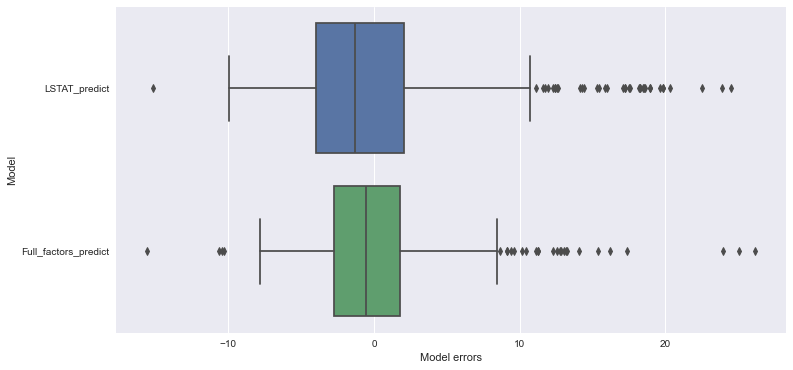

In [86]:
# визуализируем ошибку
fig, ax = plt.subplots(figsize=(12, 6))

# вsчисляем ошибку модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']]) #y_predict

# вычисляем ошибку модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])

# для удобства визуализации создадим один df из ошибок через словарь
errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat,
     'Full_factors_predict': y_errors_full}
)

# строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors')
ax.set_ylabel('Model')

Задание 2.7
<br>В ваших данных появился новый участок с определёнными параметрами.
<br>Сделайте предсказание медианной стоимости (MEDV) для данного участка c помощью модели lr_full. Введите результат предсказания в тысячах долларов. Ответ округлите до второго знака после точки-разделителя.

In [89]:
# создадим запись о новом участке с домом
X = [[0.35114, 0.00000, 7.38000, 0.00000, 0.49300,
      6.04100, 49.90000, 4.72110, 5.00000, 287.00000,
      19.60000, 396.90000, 7.70000]]

y_predict = lr_full.predict(X) #ранее мы обучили модель по lr_full её и используем

print(f'Предсказанная цена {float(y_predict):.2f}')



Предсказанная цена 22.87


c:\Users\dmitr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [87]:
# создадим словарь со значениями
new_object = {'CRIM': 0.35114, 'ZM': 0.00000, 'INDUS': 7.38000, 'CHAS': 0.00000, 'NOX': 0.49300, 'RM': 6.04100, 'AGE': 49.90000,
              'DIS': 4.72110, 'RAD': 5.00000, 'TAX': 287.00000, 'PTRATIO': 19.60000, 'B': 396.90000, 'LSTAT': 7.70000}

# создаем новый df и транспонируем его, т.к. ключ это столбец 1, а значение ключа - это столбец 2
new_df = pd.DataFrame.from_dict(new_object, orient='index').T

In [88]:
# загружаем в модель новый дата-сет со всеми признаками. Количество признаков (структура) совпадает с дата-сетом на котором обучали модель
y_predict_2_7 = lr_full.predict(new_df) #ранее мы обучили модель по lr_full её и используем

print(f'Предсказанная цена {float(y_predict_2_7):.2f}')

Предсказанная цена 22.87
